In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'], inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
x= df.iloc[:,0:-1]
y= df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size=0.2, random_state =1)

In [11]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [13]:
x_train_scaler

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model= Sequential()
model.add(Dense(8, activation='relu',input_dim=7))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='linear'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 9)                 81        
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error', optimizer = 'Adam')

In [18]:
history = model.fit(x_train_scaler, y_train, epochs=120, validation_split=0.2)

Epoch 1/120
8/8 [==============================] - 0s 17ms/step - loss: 0.7233 - val_loss: 0.7294
Epoch 2/120
8/8 [==============================] - 0s 7ms/step - loss: 0.6178 - val_loss: 0.6311
Epoch 3/120
8/8 [==============================] - 0s 8ms/step - loss: 0.5397 - val_loss: 0.5568
Epoch 4/120
8/8 [==============================] - 0s 6ms/step - loss: 0.4835 - val_loss: 0.5049
Epoch 5/120
8/8 [==============================] - 0s 4ms/step - loss: 0.4472 - val_loss: 0.4695
Epoch 6/120
8/8 [==============================] - 0s 6ms/step - loss: 0.4201 - val_loss: 0.4427
Epoch 7/120
8/8 [==============================] - 0s 6ms/step - loss: 0.3961 - val_loss: 0.4164
Epoch 8/120
8/8 [==============================] - 0s 4ms/step - loss: 0.3711 - val_loss: 0.3878
Epoch 9/120
8/8 [==============================] - 0s 5ms/step - loss: 0.3421 - val_loss: 0.3539
Epoch 10/120
8/8 [==============================] - 0s 5ms/step - loss: 0.3012 - val_loss: 0.3045
Epoch 11/120
8/8 [==========

In [19]:
y_pred = model.predict(x_test_scaler)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8199435222271039

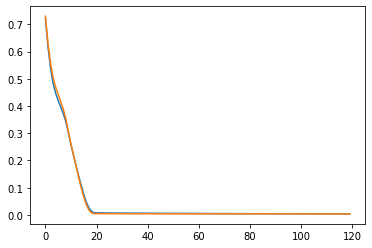

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])